In [2]:
# install necessary libraries for osmnx and visualization
import osmnx as ox
import pandas as pd
import numpy as np
import networkx 
import matplotlib

Plug and play with osmnx and plotting to familiarize self with different aspects of it

In [5]:
# load in data from lincoln square from osmnx
lsq_name = "Lincoln Square, Chicago, Illinois, USA"

In [9]:
import folium # for plotting
graph = ox.graph_from_place(lsq_name, network_type='drive')
nodes, streets = ox.graph_to_gdfs(graph)

,y,x,highway,street_count,geometry
osmid,,,,,
26794572,41.961461,-87.678962,traffic_signals,4,POINT (-87.67896 41.96146)
26794593,41.961526,-87.673964,traffic_signals,4,POINT (-87.67396 41.96153)
26794603,41.961495,-87.676016,traffic_signals,4,POINT (-87.67602 41.96149)
26794604,41.961477,-87.677502,NaN,4,POINT (-87.67750 41.96148)
26794631,41.961517,-87.674511,NaN,4,POINT (-87.67451 41.96152)


In [ ]:
ox.folium.plot_graph_folium(graph)

In [ ]:
# start exploring bike-specific features
bike_graph = ox.graph_from_place(lsq_name, network_type="bike")
ox.folium.plot_graph_folium(bike_graph)

In [158]:
# helper function that finds nearest node to lat long info based on gdf 
def get_nearest_node(node_gdf, coord):
    # calculate difference between lat and long in all nodes in data
    node_gdf['diff_lat'] = abs(node_gdf['y'] - coord[0])
    node_gdf['diff_long'] = abs(node_gdf['x'] - coord[1])
    # calculate smallest difference (simple addition of differences)
    node_gdf['coord'] = node_gdf['diff_lat'] + node_gdf['diff_long']
    # filter data for nearest node 
    nearest_node = node_gdf.loc[node_gdf['coord'] == node_gdf['coord'].min()]
    # return nearest node id
    return list(nearest_node.index)[0]
    
# function that, given two tuples of coordinates, and
# an osmnx graph, returns optimal route
def route_by_graph(coord1, coord2, ox_graph):
    # create geopandas dataframe of graph
    nodes, edges = ox.graph_to_gdfs(ox_graph)

    # get closest nodes on graph to origin and destination
    coord1_node = get_nearest_node(nodes, coord1)
    coord2_node = get_nearest_node(nodes, coord2)

    # plot (example taken from osmnx git examples)
    route = ox.shortest_path(ox_graph, coord1_node, coord2_node, weight="length")
    fig, ax = ox.plot_graph_route(ox_graph, route, route_color="y", route_linewidth=5, node_size=0) 

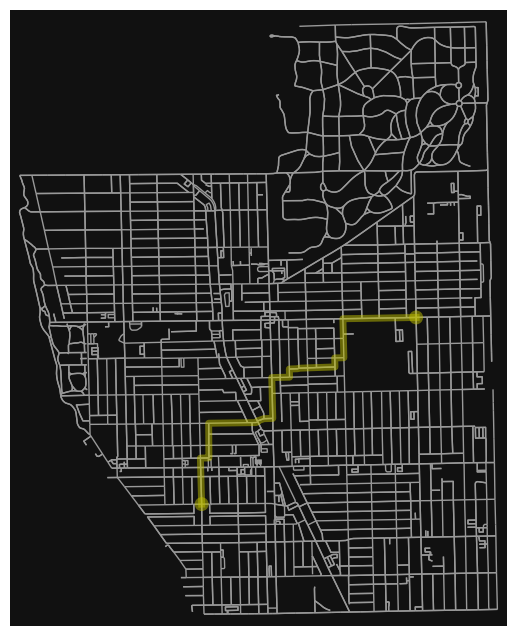

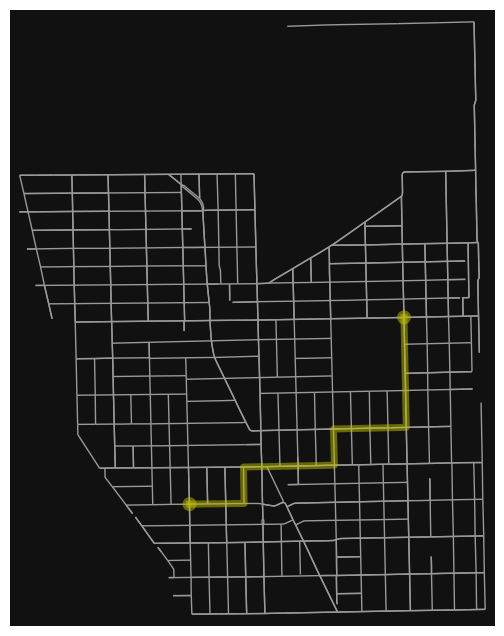

In [160]:
    
# run it on two bagel shops in lincoln square (coordinates pulled manually from google maps)
bean_bagel = (41.96679651618798, -87.69396103409798)
bagel_miller = (41.96660738036854, -87.68678658807178)
#route_by_graph(bean_bagel, bagel_miller, bike_graph)

# try route by not-bikeing
car_graph = ox.graph_from_place(lsq_name, network_type="drive")
#route_by_graph(bean_bagel, bagel_miller, car_graph)

# try new route further across square, from beans&bagels to side practice
side_practice = (41.97600416481625, -87.67910278807132)

route_by_graph(bean_bagel, side_practice, bike_graph)
route_by_graph(bean_bagel, side_practice, car_graph)